# BT5151 ASSIGNMENT 1 (Academic Year 2025/2026)
## Critical Incident Report: NorthBridge Bank Credit Approval System Failure
### Classification: Internal Investigation 

---

## ASSIGNMENT BRIEFING

**Date:** January 2026  
**Client:** NorthBridge Bank - Risk & Compliance Division  
**Incident:** Production ML system failure resulting in $2.3M in estimated losses  
**Your Role:** Junior Data Science Investigator  
**Reporting To:** Chief Risk Officer

### Background

In September 2025, NorthBridge Bank deployed an upgraded deep learning model for personal loan credit decisions, replacing a simpler baseline system that had operated reliably for 18 months. The upgrade was approved based on laboratory tests showing the deeper architecture could theoretically capture more complex borrower patterns.

**What went wrong:**
- Within 3 weeks, loan approval quality degraded significantly
- Default rates on newly approved loans increased by 40%
- The model appeared to be making near-random decisions despite showing "successful training" in monitoring dashboards
- Emergency rollback to the baseline model was executed on October 15, 2025

**Your Mission:**
Reproduce the failure in a controlled environment, identify the root cause through comparative analysis and gradient measurements, and provide a comprehensive technical and business explanation.

---

## SUBMISSION REQUIREMENTS

**What you must submit:**
1. This completed Jupyter notebook as `YourStudentID_CreditInvestigation.ipynb`
2. All code cells executed with visible outputs
3. All written answers completed in markdown cells

**Mandatory outputs in your notebook:**
- [ ] Comparative loss plot showing both models (Part 2)
- [ ] Printed gradient comparison values (Part 3)
- [ ] Written answers for Q1, Q2, Q3

**Before submission:**
- Run: Kernel → Restart & Run All (must complete without errors)
- Verify all plots have titles, labels, and legends
- Ensure all written answers reference specific evidence

---

## INVESTIGATION PROTOCOLS (Non-Negotiable)

**You MUST NOT change:**
- Dataset generation code or random seeds
- Loss function (BCELoss)
- Optimizer (SGD with lr=0.1)
- Batch size (32) or number of epochs (25)
- Network layer sizes when specified

**You MUST:**
- Implement all TODOs with working Python code
- Support every written answer with quantitative evidence
- Answer in your own words, demonstrating understanding

**Protocol violations result in mark deductions as specified in the rubric.**

---

## Part 0: Controlled Environment Setup
### ⚠️ DO NOT MODIFY THIS SECTION ⚠️

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt

# Deterministic execution
torch.manual_seed(42)
torch.cuda.manual_seed_all(42)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

# Simulated credit application data
X = torch.randn(1200, 10)  # 1200 applications, 10 features each
y = (X[:, 0] + 0.8 * X[:, 1] - 0.6 * X[:, 2] > 0).float().unsqueeze(1)

dataset = TensorDataset(X, y)
loader = DataLoader(dataset, batch_size=32, shuffle=True)

print(f"Dataset loaded: {X.shape[0]} applications, {X.shape[1]} features")
print(f"Approval rate: {y.mean().item()*100:.1f}%")

Dataset loaded: 1200 applications, 10 features
Approval rate: 49.3%


---
## Part 1: Model Architectures

### Investigation Objective
Implement both the trusted baseline model (1 hidden layer, ReLU) and the failed deep model (4 hidden layers, Sigmoid). These will be trained identically to isolate the architectural difference as the failure cause.

### Technical Task
Complete the two model classes and the shared training function.


In [2]:
class BaselineCreditModel(nn.Module):
    """NorthBridge Bank's original production model (March 2024 - Sept 2025)"""
    def __init__(self):
        super().__init__()
        
        # TODO 1: Create the baseline architecture
        # Architecture: Input (10) → Hidden (16) → Output (1)
        # Use ReLU after hidden layer, Sigmoid for final output
        #
        # Create these layers and store as instance variables:
        # - First linear layer: nn.Linear(input_size, hidden_size)
        # - Second linear layer: nn.Linear(hidden_size, output_size)  
        # - ReLU activation: nn.ReLU()
        # - Sigmoid activation: nn.Sigmoid()
        #
        # Your code here:
        self.fc1 = nn.Linear(10, 16)
        self.fc2 = nn.Linear(16, 1)
        
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()

        

    def forward(self, x):
        # TODO 2: Implement forward pass
        # Flow: input → fc1 → relu → fc2 → sigmoid → output
        #
        # Apply each layer/activation in sequence and return final result
        #
        # Your code here:
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.sigmoid(x)
        return x

        

In [3]:
class DeepCreditModel(nn.Module):
    """NorthBridge Bank's failed deep model (Sept-Oct 2025)"""
    def __init__(self):
        super().__init__()
        
        # TODO 3: Create the deep architecture with 4 hidden layers
        # Architecture: Input (10) → Hidden1 (16) → Hidden2 (16) → Hidden3 (16) → Hidden4 (16) → Output (1)
        # Use Sigmoid activation after EVERY layer (this is the critical failure point)
        #
        # Create five linear layers:
        # - Layer 1: 10 → 16
        # - Layers 2-4: 16 → 16 each
        # - Layer 5 (output): 16 → 1
        # Also create Sigmoid activation
        #
        # Hint: Name them fc1, fc2, fc3, fc4, fc5, sigmoid
        #
        # Your code here:
          
        self.fc1 = nn.Linear(10, 16)
        self.fc2 = nn.Linear(16, 16)
        self.fc3 = nn.Linear(16, 16)
        self.fc4 = nn.Linear(16, 16)
        self.fc5 = nn.Linear(16, 1)
        
        self.sigmoid = nn.Sigmoid()


    def forward(self, x):
    
        # TODO 4: Implement forward pass
        # Flow: input → fc1 → sigmoid → fc2 → sigmoid → fc3 → sigmoid → fc4 → sigmoid → fc5 → sigmoid → output
        #
        # Apply Sigmoid after EVERY layer (all 5 layers)
        # Return the final output
        #
        # Your code here:
        x = self.fc1(x)
        x = self.sigmoid(x)
        
        x = self.fc2(x)
        x = self.sigmoid(x)
        
        x = self.fc3(x)
        x = self.sigmoid(x)
        
        x = self.fc4(x)
        x = self.sigmoid(x)
        
        x = self.fc5(x)
        x = self.sigmoid(x)
        
        return x

In [4]:
def train_model(model, loader, epochs=25):
    """Standard training procedure - DO NOT MODIFY HYPERPARAMETERS"""
    
    # TODO 5: Implement the training loop
    #
    # SETUP:
    # - Create criterion: nn.BCELoss()
    # - Create optimizer: optim.SGD(model.parameters(), lr=0.1)
    # - Create empty list called 'losses' to store loss per epoch
    
    # Your setup code here:
    criterion = nn.BCELoss()
    optimizer = optim.SGD(model.parameters(), lr=0.1)
    losses = []
    
    # TRAINING LOOP:
    for epoch in range(epochs):
        epoch_loss = 0.0
        
        for inputs, targets in loader:
            # Your training code here:
            # 1. Zero gradients: optimizer.zero_grad()
            # 2. Forward pass: outputs = model(inputs)
            # 3. Compute loss: loss = criterion(outputs, targets)
            # 4. Backward: loss.backward()
            # 5. Update: optimizer.step()
            # 6. Accumulate: epoch_loss += loss.item()
            # 1. Zero gradients
            optimizer.zero_grad()
            
            # 2. Forward pass
            outputs = model(inputs)
            
            # 3. Compute loss
            loss = criterion(outputs, targets)
            
            # 4. Backward pass
            loss.backward()
            
            # 5. Update weights
            optimizer.step()
            
            # 6. Accumulate batch loss
            epoch_loss += loss.item()
        
        
    
        
        losses.append(epoch_loss)
    
    return losses

---
## Part 2: Comparative Training Analysis

### Investigation Objective
Train both models using identical procedures and directly compare their learning behaviours. This reveals whether the architectural change alone caused the failure.

### Technical Task
Execute training for both models and create a single comparative visualization.


Baseline final loss: 1.5528
Deep model final loss: 26.3858


<Figure size 1000x600 with 0 Axes>

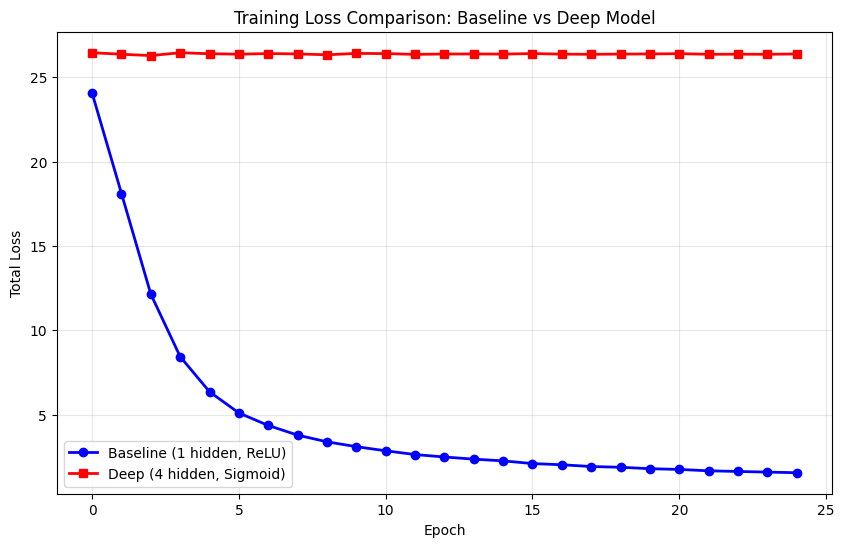

In [5]:
# TODO 6: Train both models and create comparative plot
#
# PART A: Create and train both models
# 1. Create baseline_model = BaselineCreditModel()
# 2. Train it: baseline_losses = train_model(baseline_model, loader)
# 3. Create deep_model = DeepCreditModel()
# 4. Train it: deep_losses = train_model(deep_model, loader)
#
# Your code here:
baseline_model = BaselineCreditModel()
baseline_losses = train_model(baseline_model, loader)
deep_model = DeepCreditModel()
deep_losses = train_model(deep_model, loader)


# PART B: Print final losses
# Print final loss for both models (use index -1 for last item)
# Format: "Baseline final loss: {value:.4f}"
# Format: "Deep model final loss: {value:.4f}"
#
# Your code here:
print(f"Baseline final loss: {baseline_losses[-1]:.4f}")
print(f"Deep model final loss: {deep_losses[-1]:.4f}")


# PART C: Create comparative plot (some scaffolding provided)
plt.figure(figsize=(10, 6))

# Plot both loss curves:
# - Baseline: blue line ('b-o'), linewidth=2, label='Baseline (1 hidden, ReLU)'
# - Deep: red line ('r-s'), linewidth=2, label='Deep (4 hidden, Sigmoid)'
# Use range(25) for x-axis (epochs 0-24)
#
# Your plotting code here:
plt.figure(figsize=(10, 6))
plt.plot(range(25), baseline_losses, 'b-o', linewidth=2, label='Baseline (1 hidden, ReLU)')
plt.plot(range(25), deep_losses, 'r-s', linewidth=2, label='Deep (4 hidden, Sigmoid)')


# Labels and formatting (provided)
plt.xlabel('Epoch')
plt.ylabel('Total Loss')
plt.title('Training Loss Comparison: Baseline vs Deep Model')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

### Investigation Finding Q1 (8 marks)

**QUESTION:** Based on the comparative plot, describe how the two models' learning behaviours differ. Reference specific observations from the loss curves and final loss values.

**Requirements:**
- State which model achieves lower final loss (quote both values)
- Describe the convergence pattern of each model (smooth decline, plateau, erratic, etc.)
- Explain what this means for production reliability
- 80-120 words

---
**YOUR ANSWER:**

For the baseline model, its final loss is substantially lower than the deep model, which is 1.558 versus 26.385. In the loss curves, the baseline shows a steady and smooth descent along the epochs, which means that the optimization has been achieved, and gradient propagation has been effective. Conversely, the deep model suffers a loss of precision and accuracy within a short time (loss~26) and fails to show any considerable progress during training. This implies serious optimization problems stemming from the vanishing of gradients because of repeated sigmoids making activations. When it comes to the deployment of the baseline model, its reliability is significantly greater than that of the deep model, since the baseline models converge, and the loss is predictably reduced, while the deep models do not learn effectively and can potentially fail.

---

---
## Part 3: Gradient Forensics

### Investigation Objective
The CRO asks: *"If training appeared successful, what internal mechanism failed that our dashboards didn't catch?"*

Answer: Examine gradient flow. In deep networks with Sigmoid activations, gradients can vanish by the time they reach early layers, preventing effective learning.

### Technical Task
Measure first-layer gradient magnitudes in both models to provide quantitative evidence.


In [ ]:
# TODO 7: Measure and compare gradient magnitudes
#
# Get one batch of data (provided)
inputs, targets = next(iter(loader))

# PART A: Baseline model gradients
# 1. Forward pass: baseline_outputs = baseline_model(inputs)
# 2. Compute loss: baseline_loss = nn.BCELoss()(baseline_outputs, targets)
# 3. Backward: baseline_loss.backward()
# 4. Extract gradient norm: baseline_grad = baseline_model.fc1.weight.grad.norm().item()
#
# Your code here:
criterion = nn.BCELoss()
baseline_model.zero_grad()
baseline_outputs = baseline_model(inputs)
baseline_loss = criterion(baseline_outputs, targets)
baseline_loss.backward()
baseline_grad = baseline_model.fc1.weight.grad.norm().item()
# PART B: Deep model gradients
# 1. Forward pass: deep_outputs = deep_model(inputs)
# 2. Compute loss: deep_loss = nn.BCELoss()(deep_outputs, targets)
# 3. Backward: deep_loss.backward()
# 4. Extract gradient norm: deep_grad = deep_model.fc1.weight.grad.norm().item()
#
# Your code here:
deep_model.zero_grad()
deep_outputs = deep_model(inputs)
deep_loss = criterion(deep_outputs, targets)
deep_loss.backward()
deep_grad = deep_model.fc1.weight.grad.norm().item()

# PART C: Calculate and print comparison
# Calculate ratio: deep_grad / baseline_grad
# Print formatted output as shown below
#
# Your code here:
# Print formatting (provided)
ratio = deep_grad / baseline_grad
print("=" * 60)
print("GRADIENT ANALYSIS: First Layer Weight Gradient Norms")
print("=" * 60)
print(f"Baseline gradient norm: {baseline_grad:.6f}")
print(f"Deep model first-layer gradient norm: {deep_grad:.6f}")
print(f"Deep/Baseline gradient ratio: {ratio:.6f}")
print("=" * 60)


GRADIENT ANALYSIS: First Layer Weight Gradient Norms
Baseline gradient norm: 0.320113
Deep model first-layer gradient norm: 0.000099
Deep/Baseline gradient ratio: 0.000310


### Investigation Finding Q2 (12 marks)

**QUESTION:** Which model shows weaker first-layer gradients? Using the ratio you calculated, explain what this means for learning in the early layers and why this is problematic.

**Requirements:**
- Quote both gradient norm values (6 decimal places)
- State and interpret the ratio (e.g., "Deep model gradients are X times smaller")
- Explain the connection between gradient magnitude and weight updates
- Explain why weak early-layer learning damages overall model performance
- 100-150 words

---
**YOUR ANSWER:**
The deep model exhibits a significantly low first-layer gradient. The norm of the gradient, which is in the first level of the baseline model, is 0.320113, while that of the deep model is merely 0.000099. This ratio (0.000310) implies that the deep model's gradients are roughly 3,226 times lower than the baseline model''s (1/0.000310). The magnitude of the gradient determines the size of the update to the weights during backpropagation. When the gradient values are very low, the parameter updates hardly make an impact on the model weights, and as a result, the early-layer weights stay unchanged through the training epochs. Since early layers capture only basic features, excessively poor learning at this stage inhibits profound representations from forming. This severely limits downstream layers, leading to stalled optimization and poor overall model performance consistent with the deep model’s high final loss.

---

---
## Part 4: Root Cause Diagnosis & Business Impact

### Investigation Objective
Synthesize all evidence into a comprehensive explanation suitable for both technical and non-technical stakeholders.


### Investigation Finding Q3 - Comprehensive Diagnosis (20 marks)

**QUESTION:** Provide a complete explanation of why the deep model failed. Your answer must address three audiences: technical ML engineers, data science managers, and the Chief Risk Officer.

**Required Components:**

**Part A: Technical Mechanism (8 marks)**
- Explain how gradients propagate backward through the network (chain rule)
- Explain why Sigmoid activation causes gradient shrinking (derivative range: 0 to 0.25)
- Show how repeated multiplication of small numbers causes exponential decay
- Provide a numerical example: compare gradient shrinkage across 1 layer vs 4 layers
- Reference your actual gradient measurements as evidence

**Part B: Architectural Analysis (6 marks)**
- Explain why adding more layers made the problem worse
- Explain why the baseline (1 hidden layer, ReLU) avoided this issue
- Discuss the role of activation function choice in deep networks

**Part C: Business Impact & Recommendations (6 marks)**
- Explain to the CRO (no technical jargon) what went wrong
- Why did standard training dashboards show "success" when the model was actually failing?
- What are the consequences for credit decisions when early layers don't learn?
- Provide 2-3 specific recommendations to prevent this in future deployments

**Formatting:**
- Use headers to separate Parts A, B, and C
- Total length: 350-500 words
- Professional tone throughout

---
**YOUR ANSWER:**

#### Part A: Technical Mechanism

Gradients propagate backward via the chain rule, meaning the gradient at early layers equals the product of derivatives from all subsequent layers. When Sigmoid activation is used, its derivative lies between 0 and 0.25, and becomes very small when activations saturate.

Gradients are multiplied layer by layer, repeated multiplication of values ≤ 0.25 leads to exponential decay. For example:

1 hidden layer: maximum shrinkage ≈ 0.25

4 hidden layers: 
0.25
4
≈
0.0039
0.25
4
≈0.0039

Including output layer: 
0.25
5
≈
0.00098
0.25
5
≈0.00098

Thus, even moderate derivatives quickly collapse toward zero.

Our measured first-layer gradient norms confirm this effect:
Baseline = 0.320113
Deep model = 0.000099
Ratio = 0.000310

It  means the deep model’s gradients are approximately 3,226 times smaller than the baseline. Such extremely small gradients result in negligible weight updates in early layers, preventing meaningful feature learning and leading directly to the deep model high final loss (26.3858).

#### Part B: Architectural Analysis

More layers worsened the problem because each additional Sigmoid layer multiplied the gradient by a value ≤ 0.25, compounding attenuation exponentially. With four hidden Sigmoid layers, the signal reaching the first layer effectively collapsed.

The baseline model avoided this issue because it used ReLU, whose derivative is 1 for positive inputs. ReLU does not saturate in the positive region and therefore preserves gradient magnitude. This explains the baseline's smooth convergence and low final loss (1.5528).

This case demonstrates a core deep learning principle: depth increases representational power, but without appropriate activation functions, optimization becomes unstable. Activation choice is not cosmetic,it determines whether gradients survive.

#### Part C: Business Impact & Recommendations


For the CFO, the deeper model was structurally unable to learn since gradient signals internally weakened as they propagated backwards. It was an internal failure even though training was technically finished with low loss values. Dashboards reported loss values, but not gradient health, so it went unnoticed. If the first layers of a model are not able to learn good features, credit decisions in part depend on inferior feature extraction. It decreases the ability to discriminate low-risk and high-risk borrowers and increases the chance of misclassifying and therefore risk of losses. Recommendations: Enforce the use of gradient-flow diagnostics (per layer gradient norms across epochs). Enforce architectural review every time depth increases, including the use a sandbox.
This failure was not data related it was an avoidable architectural oversight.

---

---
---

# ASSESSMENT RUBRIC (Total: 100 marks)

## Part A: Implementation (60 marks)

| Component | Excellent | Good | Satisfactory | Needs Improvement |
|-----------|-----------|------|--------------|-------------------|
| **TODO 1-2: Baseline Model**<br>(10 marks) | **9-10**: Correct architecture (10→16→1), proper layer creation and activation placement, clean code, model runs without errors | **7-8**: Correct architecture with minor code style issues or inefficiencies | **5-6**: Architecture mostly correct but one significant error (wrong dimensions or missing activation) | **0-4**: Multiple architectural errors or non-functional |
| **TODO 3-4: Deep Model**<br>(15 marks) | **13-15**: All 5 layers created correctly (10→16→16→16→16→1), Sigmoid applied after every layer, clean implementation, runs without errors | **10-12**: Correct layer count and structure but minor issues in implementation | **7-9**: Has required layers but errors in dimensions or activation placement | **0-6**: Wrong number of layers, incorrect architecture, or non-functional |
| **TODO 5: Training Loop**<br>(15 marks) | **13-15**: Correct setup (BCELoss, SGD lr=0.1), proper training sequence (zero_grad, forward, loss, backward, step), correct loss accumulation, returns valid list | **10-12**: Training logic correct but minor inefficiencies or code style issues | **7-9**: Training mostly works but 1-2 significant errors (wrong optimizer params, incorrect loss handling) | **0-6**: Major errors in training logic or non-functional |
| **TODO 6: Comparative Training**<br>(12 marks) | **11-12**: Both models created and trained correctly, final losses printed with proper formatting, excellent plot with all required elements (both curves, legend, labels, styling) | **9-10**: Models trained correctly, plot present but missing 1-2 formatting elements or minor print formatting issues | **6-8**: Training works, basic plot present but poor styling, missing legend, or incomplete output | **0-5**: Training fails, plot severely deficient, or major errors |
| **TODO 7: Gradient Analysis**<br>(8 marks) | **7-8**: Correct gradient extraction for both models, proper norm calculation, ratio computed, formatted output with all values correctly displayed | **5-6**: Gradient extraction correct but minor issues in formatting or ratio calculation | **3-4**: Gradients extracted but errors in norm calculation or incomplete comparison | **0-2**: Major errors in gradient extraction or non-functional |

---

## Part B: Written Analysis (40 marks)

| Question | Excellent | Good | Satisfactory | Needs Improvement |
|----------|-----------|------|--------------|-------------------|
| **Q1: Learning Behavior**<br>(8 marks) | **7-8**: Clear comparison, quotes both final losses accurately, describes patterns with specific observations, explains production implications meaningfully, appropriate length (80-120 words) | **5-6**: Good comparison with evidence but missing one element or weak business connection | **3-4**: Basic observations but lacks specific values or unclear interpretation | **0-2**: Vague answer without evidence or incorrect interpretation |
| **Q2: Gradient Analysis**<br>(12 marks) | **11-12**: Quotes both gradient norms (6 decimals), calculates and interprets ratio correctly with clear explanation, thoroughly explains gradient-to-learning connection, explains early-layer impact comprehensively, appropriate length (100-150 words) | **8-10**: Good analysis with evidence but missing depth in one area (e.g., weak explanation of weight update mechanism or early-layer impact) | **5-7**: Identifies weak gradients and quotes values but incomplete explanation, missing ratio interpretation, or unclear connections | **0-4**: Lacks quantitative evidence, major misconceptions, or very brief |
| **Q3: Comprehensive Diagnosis**<br>(20 marks) | **18-20**: **Part A (8)**: Thorough backpropagation explanation, sigmoid derivative range clearly stated (0-0.25), compelling numerical example with calculations, cites actual gradient measurements. **Part B (6)**: Explains depth compounding with clear logic, meaningful ReLU vs Sigmoid comparison, discusses activation function importance. **Part C (6)**: Clear non-technical explanation, addresses monitoring blind spots thoughtfully, discusses credit decision impacts specifically, provides 2-3 actionable recommendations. Well-organized with clear headers, professional tone, 350-500 words | **14-17**: Strong technical explanation (Part A) with minor gaps, good architectural analysis (Part B), but Part C lacks depth or missing complete recommendations. OR excellent Parts B & C but Part A missing numerical example or doesn't cite own measurements. 300-550 words | **10-13**: Covers all three parts but superficially. Missing key concepts (e.g., vague on chain rule, no numerical example, generic recommendations, doesn't explain ReLU advantage). Parts not clearly separated. 250-350 words | **0-9**: Missing entire sections, major technical errors, heavily jargon-laden Part C inappropriate for CRO, or far too brief (<200 words) |

---

